Connection of google colab

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import liberaries

In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,Embedding, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import joblib
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

Upload dataset

In [32]:
# Loading the dataset
data_import = pd.read_excel('/content/drive/MyDrive/expanded_data.xlsx')

In [33]:
# Display the first few rows of the dataset
print(data_import.head())

    Age      Sex HighSchool Sholarship Work ExtraCurricular Relationship  \
0  22-25  Female      State        0.5   No              No           No   
1  22-25    Male      State        0.5   No              No          Yes   
2    26+  Female    Private        0.5   No             Yes           No   
3  22-25  Female      State        0.5   No              No           No   
4  22-25  Female      State       Full  Yes              No          Yes   

    Salary Transportation Accommodation  ... Exam Prep Style  \
0  201-270            Bus        Rental  ...           alone   
1  135-200            Bus        Rental  ...           alone   
2  135-200            Bus          Dorm  ...           alone   
3     410+       Car/Taxi        Rental  ...           alone   
4  135-200            Bus        Rental  ...         friends   

  Exam Prep Duration  Note Taking  Attention Discussion Interest  \
0      close to exam    sometimes  sometimes           sometimes   
1      close to exam  

Drop unimportant features

In [34]:
columns_to_drop = ['Study Hours','Fiction Reading','Academic Reading','Seminar Attendance','Project Impact','Class Attendance','Exam Prep Style','Exam Prep Duration','Note Taking','Attention','Discussion Interest','Flip Classroom','PeviousCGPA','Expected CGPA',]

In [35]:
data_import = data_import.drop(columns=columns_to_drop)

In [36]:
data_import .head()

,Age,Sex,HighSchool,Sholarship,Work,ExtraCurricular,Relationship,Salary,Transportation,Accommodation,Mother Edu,Father Edu,Siblings,Parental Stat,Mother Occupation,Father Occupation,GRADE,CourseID
0,22-25,Female,State,0.5,No,No,No,201-270,Bus,Rental,Secondary,Secondary,2,Married,Housewife,Retired,DD,1
1,22-25,Male,State,0.5,No,No,Yes,135-200,Bus,Rental,HighSchool,Secondary,5,Married,Housewife,self-employed,BA,6
2,26+,Female,Private,0.5,No,Yes,No,135-200,Bus,Dorm,University,University,1,Married,Retired,Gov officer,DD,8
3,22-25,Female,State,0.5,No,No,No,410+,Car/Taxi,Rental,PHD,Primary,3,Married,Housewife,Gov officer,DC,1
4,22-25,Female,State,Full,Yes,No,Yes,135-200,Bus,Rental,Primary,Primary,2,Married,Housewife,Housewife,DD,8


When you need to perform specific preprocessing steps like encoding these categorical features before feeding them into a machine learning model

In [37]:
categorical_columns = data_import.select_dtypes(include=['object']).columns

In [38]:
data_import[categorical_columns] = data_import[categorical_columns].astype(str)

Encoding the above

In [39]:
label_encoder = LabelEncoder()

# Step 4: Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data_import[col] = label_encoder.fit_transform(data_import[col])

In [40]:
data_import.head()

,Age,Sex,HighSchool,Sholarship,Work,ExtraCurricular,Relationship,Salary,Transportation,Accommodation,Mother Edu,Father Edu,Siblings,Parental Stat,Mother Occupation,Father Occupation,GRADE,CourseID
0,1,0,2,1,0,0,0,1,1,3,4,4,2,2,1,3,6,1
1,1,1,2,1,0,0,1,0,1,3,0,4,5,2,1,4,1,6
2,2,0,1,1,0,1,0,0,1,0,5,5,1,2,3,0,6,8
3,1,0,2,1,0,0,0,4,2,3,2,3,3,2,1,0,5,1
4,1,0,2,3,1,0,1,0,1,3,3,3,2,2,1,1,6,8


Training Recurrent Neural Network

In [62]:
X = data_import.drop(columns=['GRADE'])
y = data_import['GRADE']

In [63]:
# Separate the features and target variable
X = data_import.drop(columns=['GRADE'])
y = data_import['GRADE']

# Print the features (X)
print("Features (X):")
X

Features (X):


,Age,Sex,HighSchool,Sholarship,Work,ExtraCurricular,Relationship,Salary,Transportation,Accommodation,Mother Edu,Father Edu,Siblings,Parental Stat,Mother Occupation,Father Occupation,CourseID
0,1,0,2,1,0,0,0,1,1,3,4,4,2,2,1,3,1
1,1,1,2,1,0,0,1,0,1,3,0,4,5,2,1,4,6
2,2,0,1,1,0,1,0,0,1,0,5,5,1,2,3,0,8
3,1,0,2,1,0,0,0,4,2,3,2,3,3,2,1,0,1
4,1,0,2,3,1,0,1,0,1,3,3,3,2,2,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,2,2,0,1,0,0,1,0,4,4,1,2,1,3,7
996,0,1,0,1,0,1,0,1,1,0,3,0,4,2,1,0,1
997,1,1,0,1,1,1,0,2,1,0,0,5,4,1,1,1,2
998,1,1,2,1,0,1,1,0,1,3,5,5,3,2,1,0,1


Scaling the dataset

In [64]:
# Initialize and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as f:
    joblib.dump(scaler, f)

In [66]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 17))  # Shape: (num_samples, 1, 17)
X_test = np.reshape(X_test, (X_test.shape[0], 1, 17))

Defines and compiles a Recurrent Neural Network (RNN) model using the Keras libra

In [46]:
model = Sequential()

# Add RNN layer
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, 17)))  # Input shape should match (timesteps, features)

# Add dropout for regularization
model.add(Dropout(0.2))

# Add dense layer
model.add(Dense(30, activation='relu'))


model.add(Dense(8, activation='softmax'))
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
print(X_train.shape)  # Should be (num_samples, 1, 17)
print(X_test.shape)   # Should be (num_samples, 1, 17)

(800, 1, 17)
(200, 1, 17)


This is often used to prevent overfitting and to save computational resources by stopping the training process when the model's performance is not improving.

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [49]:
history = model.fit(
    X_train, y_train,
    epochs=20,                # Number of epochs to train
    batch_size=32,            # Batch size
    validation_split=0.2,
    callbacks=[early_stopping],# Fraction of data to be used for validation
    verbose=1                 # Verbosity mode (1 for progress bar, 0 for silent)
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2372 - loss: 1.9984 - val_accuracy: 0.4187 - val_loss: 1.5804
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5236 - loss: 1.4018 - val_accuracy: 0.6187 - val_loss: 1.2180
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6751 - loss: 1.0346 - val_accuracy: 0.7437 - val_loss: 0.8996
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7263 - loss: 0.7812 - val_accuracy: 0.8000 - val_loss: 0.5987
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8231 - loss: 0.5721 - val_accuracy: 0.8562 - val_loss: 0.4802
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8541 - loss: 0.4349 - val_accuracy: 0.8938 - val_loss: 0.3375
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8677 - loss: 0.3764 - val_accuracy: 0.9500 - val_loss: 0.2607
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9121 - loss: 0.3240 - val_accuracy: 0.9375 - val

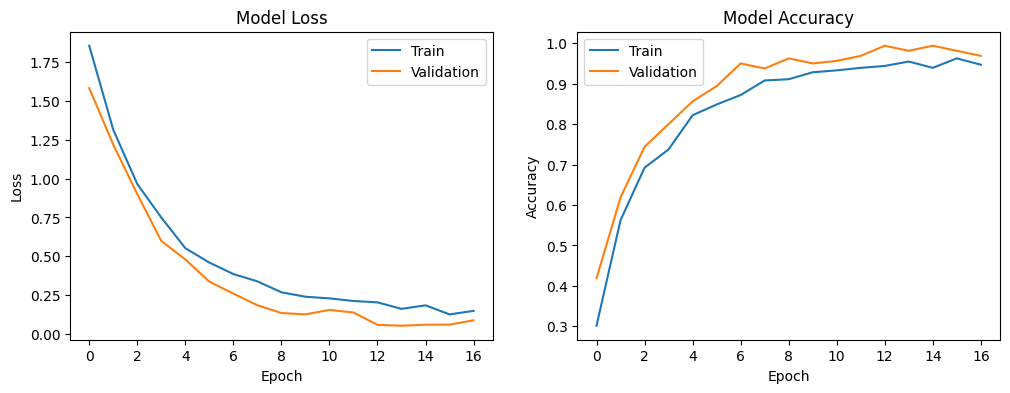

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

This cell below will show the Test loss and Test accuracy



In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9532 - loss: 0.0917 
Test Loss: 0.0861164852976799
Test Accuracy: 0.9549999833106995


Save the Model

In [61]:
# Save the model
model_filename = 'model.pkl'
with open(model_filename, 'wb') as f:
    joblib.dump(model, f)

print(f"Scaler saved as {scaler_filename}")
print(f"Model saved as {model_filename}")

Scaler saved as scaler.pkl
Model saved as model.pkl
